In [1]:
import time
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 30)

# Get Supercoach Data

In [2]:
df_player_match_results = pd.read_csv('outputs/sc_rounds/player_match_results_COMBINED.csv', index_col=0)
df_player_match_results['player_round_id'] = df_player_match_results['feed_id'].astype('str') + "_" + df_player_match_results['round_number_alt'].astype('str')
df_player_match_results

,coach_id,coach_team_id,coach_first_name,coach_team_name,player_id,points,on_field,feed_id,first_name,last_name,team,round_number,round_number_alt,player_round_id
0,180650,33301,Jordan,"What's Up, Doch?",587,134,True,270919,Tom,Rockliff,PTA,10,R10,270919_R10
1,180650,33301,Jordan,"What's Up, Doch?",645,116,True,992374,Dan,Butler,STK,10,R10,992374_R10
2,180650,33301,Jordan,"What's Up, Doch?",755,113,True,295467,Jack,Macrae,WBD,10,R10,295467_R10
3,180650,33301,Jordan,"What's Up, Doch?",597,112,True,1000223,Liam,Baker,RIC,10,R10,1000223_R10
4,180650,33301,Jordan,"What's Up, Doch?",469,107,True,290528,Max,Gawn,MEL,10,R10,290528_R10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,10857,189,Anthony,The Full Bonty,576,45,True,997142,Peter,Ladhams,PTA,9,R9,997142_R9
172,10857,189,Anthony,The Full Bonty,322,73,False,298524,Lachie,Weller,GCS,9,R9,298524_R9
173,10857,189,Anthony,The Full Bonty,286,87,False,293713,Brandon,Ellis,GCS,9,R9,293713_R9
174,10857,189,Anthony,The Full Bonty,413,0,False,280109,Callan,Ward,GWS,9,R9,280109_R9


In [3]:
df_combined_fixture_results = pd.read_csv('outputs/sc_rounds/fixture_results_COMBINED.csv', index_col=0)
df_combined_fixture_results

,round_number,match_name,home_team_id,home_team_name,home_team_coach,home_team_points,away_team_id,away_team_name,away_team_coach,away_team_points
0,10,Paul vs Lester,182,Coronaviney,Paul,1583,9806,HoweIMetYourMother,Lester,1548
0,10,James vs Anthony,9867,Bad Boys For Fyfe,James,1516,189,The Full Bonty,Anthony,1792
0,10,Jordan vs Mark,33301,"What's Up, Doch?",Jordan,1598,186,GetRichOrDieTryin,Mark,1437
0,10,Simon vs Luke,9856,It's always Sonny,Simon,1694,5524,The Dragon's Laird,Luke,1318
0,1,Paul vs Mark,182,Coronaviney,Paul,1686,186,GetRichOrDieTryin,Mark,1657
...,...,...,...,...,...,...,...,...,...,...
0,8,James vs Jordan,9867,Bad Boys For Fyfe,James,1639,33301,"What's Up, Doch?",Jordan,1630
0,9,Paul vs Anthony,182,Coronaviney,Paul,1637,189,The Full Bonty,Anthony,1630
0,9,Lester vs Mark,9806,HoweIMetYourMother,Lester,1875,186,GetRichOrDieTryin,Mark,1667
0,9,James vs Luke,9867,Bad Boys For Fyfe,James,1497,5524,The Dragon's Laird,Luke,1743


In [4]:
df_combined_fixture_results_by_team = pd.read_csv('outputs/sc_rounds/fixture_results_COMBINED_BY_TEAM.csv', index_col=0)
df_combined_fixture_results_by_team

,round_number,match_name,team_id,team_name,team_coach,team_points,opposition_team_id,opposition_team_name,opposition_team_coach,opposition_team_points
0,10,Paul vs Lester,182,Coronaviney,Paul,1583,9806,HoweIMetYourMother,Lester,1548
0,10,James vs Anthony,9867,Bad Boys For Fyfe,James,1516,189,The Full Bonty,Anthony,1792
0,10,Jordan vs Mark,33301,"What's Up, Doch?",Jordan,1598,186,GetRichOrDieTryin,Mark,1437
0,10,Simon vs Luke,9856,It's always Sonny,Simon,1694,5524,The Dragon's Laird,Luke,1318
0,1,Paul vs Mark,182,Coronaviney,Paul,1686,186,GetRichOrDieTryin,Mark,1657
...,...,...,...,...,...,...,...,...,...,...
0,8,James vs Jordan,33301,"What's Up, Doch?",Jordan,1630,9867,Bad Boys For Fyfe,James,1639
0,9,Paul vs Anthony,189,The Full Bonty,Anthony,1630,182,Coronaviney,Paul,1637
0,9,Lester vs Mark,186,GetRichOrDieTryin,Mark,1667,9806,HoweIMetYourMother,Lester,1875
0,9,James vs Luke,5524,The Dragon's Laird,Luke,1743,9867,Bad Boys For Fyfe,James,1497


# Get Fanfooty Data
- Limit to 2020

In [5]:
df_fanfooty_player = pd.read_csv('exports/scrape_20200803-122109/fanfooty_match_data_20200803-122109.csv', index_col=0)
df_fanfooty_player = df_fanfooty_player.loc[df_fanfooty_player['Year'] == 2020]
df_fanfooty_player['player_round_id'] = df_fanfooty_player['Player ID'].astype('int').astype('str') + "_" + df_fanfooty_player['Round'].astype('str')
df_fanfooty_player

C:\Users\richardm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fanfooty Match ID,Fanfooty Match URL,Round,Year,Player ID,First Name,Surname,Team,null,DT,SC,null2,null3,null4,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,Not sure,Tag,Tag Notes,Tag 2,Tag 2 Notes,null5,null6,null7,null8,Position,Jumper Number,null9,null10,null11,DT own %,SC own %,AF own %,null12,AF Breakeven,null13,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground,Metres gained,Injured,Opposition,player_round_id
88576,7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,290847.0,Dustin,Martin,RI,20,90,126,113,72,100,12,12,3,4,0,1,1,1,1,Full Time,gun,%D and %M with %T... %s as well,shovel,Rotating midfield and forward,562600.0,NaN,543000.0,NaN,Midfielder,4.0,0.0,0.0,0.0,0.0,0.0,0.0,674000.0,NaN,NaN,8.0,3.0,3.0,75.0,93.0,257.0,False,CA,290847_R1
88577,7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,290627.0,Dion,Prestia,RI,25,89,118,112,72,102,11,14,2,5,0,2,2,1,0,Full Time,star,%P and %M plus %T... %s as well,shovel,Playing inside midfield,528700.0,NaN,550200.0,NaN,Midfielder,3.0,0.0,0.0,0.0,0.0,0.0,0.0,618000.0,NaN,NaN,7.0,2.0,4.0,72.0,79.0,546.0,False,CA,290627_R1
88578,7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,993993.0,Shai,Bolton,RI,21,83,102,104,68,82,11,2,6,2,0,1,0,3,1,Full Time,hot,%D with %k by foot... also %M and %T... and bo...,pocket,Starting in a FP,231600.0,NaN,379100.0,NaN,Midfielder,29.0,0.0,0.0,0.0,0.0,0.0,0.0,223000.0,NaN,NaN,3.0,1.0,2.0,69.0,85.0,416.0,False,CA,993993_R1
88579,7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,998529.0,Ivan,Soldo,RI,16,71,100,83,61,71,4,6,2,3,25,3,0,0,1,Full Time,ruck,%H... also %D and %M with %T... %s as well... ...,NaN,NaN,264800.0,NaN,411200.0,NaN,Ruck,20.0,0.0,0.0,0.0,0.0,0.0,0.0,359000.0,NaN,NaN,9.0,5.0,0.0,90.0,58.0,133.0,False,CA,998529_R1
88580,7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,1000981.0,Daniel,Rioli,RI,16,69,99,86,57,72,8,4,3,3,0,1,1,3,0,Full Time,wing,%s from %D and %M with %T... Starting forward,NaN,NaN,380700.0,NaN,321800.0,NaN,Forward,17.0,0.0,0.0,0.0,0.0,0.0,0.0,480000.0,NaN,NaN,5.0,0.0,1.0,91.0,81.0,246.0,False,CA,1000981_R1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92091,7381,http://live.fanfooty.com.au/game/matchcentre.h...,R9,2020,1008089.0,Isaac,Quaynor,CO,2,34,52,16,25,36,7,3,1,1,0,0,0,0,0,Full Time,guard,%D... Rotating at half back,NaN,NaN,NaN,NaN,NaN,NaN,Back,35.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,80.0,81.0,151.0,False,FR,1008089_R9
92092,7381,http://live.fanfooty.com.au/game/matchcentre.h...,R9,2020,290289.0,Josh,Thomas,CO,2,34,37,24,25,36,5,4,1,2,0,0,0,0,0,Full Time,wing,%P and %T... Starting at half forward,NaN,NaN,NaN,NaN,NaN,NaN,Midfielder,24.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0,0.0,2.0,55.0,68.0,86.0,False,FR,290289_R9
92093,7381,http://live.fanfooty.com.au/game/matchcentre.h...,R9,2020,250290.0,Travis,Varcoe,CO,2,33,43,18,25,36,6,4,1,1,0,0,0,0,0,Full Time,guard,%D... Starting at half back,NaN,NaN,NaN,NaN,NaN,NaN,Forward,18.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3.0,0.0,3.0,70.0,90.0,154.0,False,FR,250290_R9
92094,7381,http://live.fanfooty.com.au/game/matchcentre.h...,R9,2020,1013974.0,Mark,Keane,CO,2,27,42,17,20,30,5,2,1,2,0,0,1,0,0,Full Time,rookie,First game... %O with %k by foot... also %T,job,In defence,NaN,NaN,NaN,NaN,Forward,47.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2.0,71.0,79.0,180.0,False,FR,1013974_R9


# Get fanfooty data for each Supercoach Player that played

In [6]:
# df_player_match_results
df_sc_merged_player = pd.merge(df_player_match_results, df_fanfooty_player, how='left', on='player_round_id')
df_sc_merged_player

,coach_id,coach_team_id,coach_first_name,coach_team_name,player_id,points,on_field,feed_id,first_name,last_name,team,round_number,round_number_alt,player_round_id,Fanfooty Match ID,Fanfooty Match URL,Round,Year,Player ID,First Name,Surname,Team,null,DT,SC,null2,null3,null4,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,Not sure,Tag,Tag Notes,Tag 2,Tag 2 Notes,null5,null6,null7,null8,Position,Jumper Number,null9,null10,null11,DT own %,SC own %,AF own %,null12,AF Breakeven,null13,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground,Metres gained,Injured,Opposition
0,180650,33301,Jordan,"What's Up, Doch?",587,134,True,270919,Tom,Rockliff,PTA,10,R10,270919_R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,180650,33301,Jordan,"What's Up, Doch?",645,116,True,992374,Dan,Butler,STK,10,R10,992374_R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,180650,33301,Jordan,"What's Up, Doch?",755,113,True,295467,Jack,Macrae,WBD,10,R10,295467_R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,180650,33301,Jordan,"What's Up, Doch?",597,112,True,1000223,Liam,Baker,RIC,10,R10,1000223_R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,180650,33301,Jordan,"What's Up, Doch?",469,107,True,290528,Max,Gawn,MEL,10,R10,290528_R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,10857,189,Anthony,The Full Bonty,576,45,True,997142,Peter,Ladhams,PTA,9,R9,997142_R9,7374.0,http://live.fanfooty.com.au/game/matchcentre.h...,R9,2020.0,997142.0,Peter,Ladhams,PA,4.0,34.0,45.0,25.0,38.0,56.0,4.0,9.0,1.0,1.0,10.0,1.0,5.0,0.0,1.0,Full Time,ruck,%H with %D... also %s... gave away %F... First...,NaN,NaN,NaN,NaN,NaN,NaN,Ruck,38.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,7.0,3.0,6.0,69.0,81.0,69.0,False,ME
1756,10857,189,Anthony,The Full Bonty,322,73,False,298524,Lachie,Weller,GCS,9,R9,298524_R9,7380.0,http://live.fanfooty.com.au/game/matchcentre.h...,R9,2020.0,298524.0,Lachlan,Weller,GC,8.0,43.0,73.0,52.0,34.0,48.0,7.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Full Time,wing,%s from %D... Playing in midfield,NaN,NaN,NaN,NaN,NaN,NaN,Forward,14.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,7.0,1.0,1.0,69.0,80.0,191.0,False,WS
1757,10857,189,Anthony,The Full Bonty,286,87,False,293713,Brandon,Ellis,GCS,9,R9,293713_R9,7380.0,http://live.fanfooty.com.au/game/matchcentre.h...,R9,2020.0,293713.0,Brandon,Ellis,GC,9.0,66.0,87.0,86.0,53.0,72.0,9.0,7.0,5.0,3.0,0.0,1.0,1.0,0.0,0.0,Full Time,wing,%D and %M with %T... On the outside,NaN,NaN,NaN,NaN,NaN,NaN,Midfielder,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,5.0,0.0,1.0,81.0,85.0,238.0,False,WS
1758,10857,189,Anthony,The Full Bonty,413,0,False,280109,Callan,Ward,GWS,9,R9,280109_R9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Fixture Difficulty

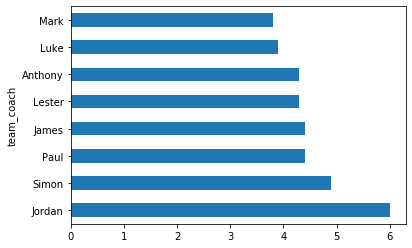

In [13]:
# df_combined_fixture_results_by_team['Rank'] = df_combined_fixture_results_by_team.groupby('round_number')['team_points'].rank(ascending=False)
# df_combined_fixture_results_by_team['Oppenent Rank'] = df_combined_fixture_results_by_team.groupby('round_number')['opposition_team_points'].rank(ascending=False)
# df_combined_fixture_results_by_team = df_combined_fixture_results_by_team.sort_values(['round_number', 'Rank'])
df_fixture_difficulty = df_combined_fixture_results_by_team.groupby('team_coach')['Oppenent Rank'].agg('mean').sort_values(ascending=False)
plot_fixture_difficulty = df_fixture_difficulty.plot(kind='barh', x='Opponent Rank', y='team_coach')

plot_fixture_difficulty

# Ladder Tracker

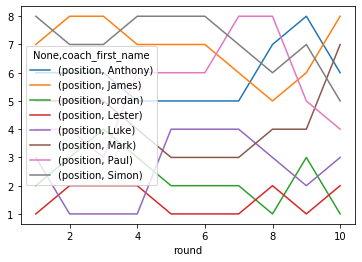

In [19]:
# Ladder position change throughout season
df_combined_weekly_ladders = pd.read_csv("outputs/ladder.csv", index_col=0)
df_grouped_ladder = pd.pivot_table(df_combined_weekly_ladders, index=['round'], columns=['coach_first_name'], values=['position'])
plot = df_grouped_ladder.plot(kind='line')
plot